# Data Wrangling and explorative data analysis

## Imports

In [42]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

## CSV Import

In [43]:
source_path = Path('./data/clean/immoscout.csv')
model_df = pd.read_csv(source_path)

In [44]:
model_df.head()

,ForestDensityM,Latitude,Longitude,NoisePollutionRailwayM,NoisePollutionRoadM,PopulationDensityM,RiversAndLakesM,RiversAndLakesS,distanceToTrainStation,gde_area_agriculture_percentage,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,0.286451,47.415927,8.085840,0.0,0.067048,0.209530,0.001811,0.011871,3.038467,30.676329,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.286451,47.415927,8.085840,0.0,0.067048,0.209530,0.001811,0.011871,3.038467,30.676329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.095877,47.397416,8.043150,0.0,0.381257,0.393783,0.188229,0.000000,0.909587,11.354420,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.286451,47.415927,8.085840,0.0,0.067048,0.209530,0.001811,0.011871,3.038467,30.676329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.279276,47.404870,8.052781,0.0,0.132933,0.136984,0.141473,0.091805,1.460245,33.137090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### transformation

Die Features werden anhand folgender Kriterien transformiert:

linksschiefe Verteilung -> Quadratische transformation

rechtsschiefe Verteilung -> logarithmische oder Quadratwurzel Transformation


In [45]:
model_df.columns

Index(['ForestDensityM', 'Latitude', 'Longitude', 'NoisePollutionRailwayM',
       'NoisePollutionRoadM', 'PopulationDensityM', 'RiversAndLakesM',
       'RiversAndLakesS', 'distanceToTrainStation',
       'gde_area_agriculture_percentage', 'gde_area_forest_percentage',
       'gde_area_nonproductive_percentage', 'gde_average_house_hold',
       'gde_empty_apartments', 'gde_foreigners_percentage',
       'gde_new_homes_per_1000', 'gde_politics_bdp', 'gde_politics_cvp',
       'gde_politics_evp', 'gde_politics_fdp', 'gde_politics_glp',
       'gde_politics_gps', 'gde_politics_pda', 'gde_politics_rights',
       'gde_politics_sp', 'gde_politics_svp', 'gde_pop_per_km2',
       'gde_population', 'gde_social_help_quota', 'gde_tax',
       'gde_workers_sector1', 'rooms', 'Floor space_m2', 'Plot area_m2',
       'living_space_m2', 'price', 'type_attic-flat', 'type_attic-room',
       'type_castle', 'type_chalet', 'type_detached-house',
       'type_detached-secondary-suite', 'type_duplex-mais

In [46]:
distribution = model_df.drop(columns=['type_attic-flat', 'type_attic-room','type_castle', 'type_chalet', 'type_detached-house','type_detached-secondary-suite', 'type_duplex-maisonette','type_farmhouse', 'type_flat', 'type_furnished-residential-property','type_loft', 'type_penthouse', 'type_rustico', 'type_secondary-suite','type_semi-detached-house', 'type_single-room','type_stepped-apartment', 'type_stepped-house', 'type_studio','type_terrace-house', 'type_villa'])

In [47]:
grid_number = int(distribution.columns.shape[0]**0.5)

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

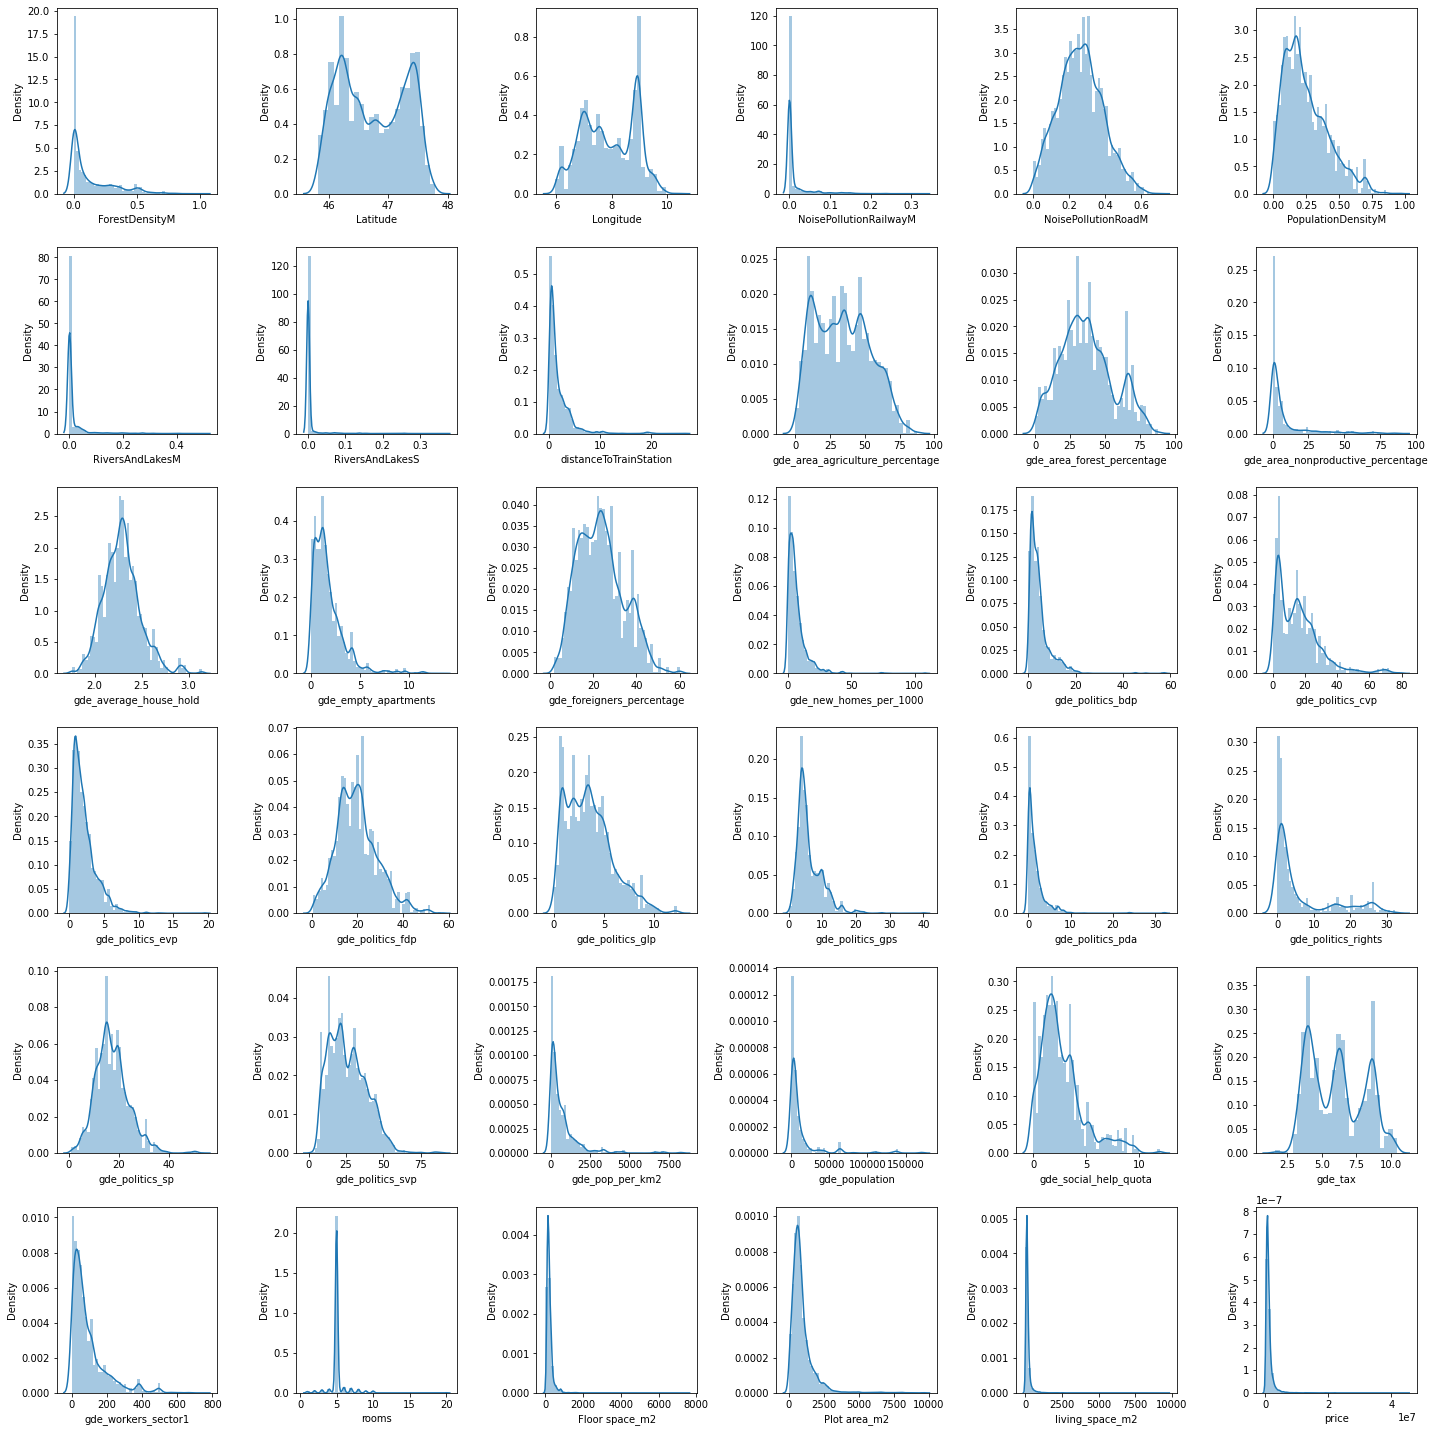

In [48]:
# Plotting the distribution of the data in a subplot
fig, axes = plt.subplots(nrows=grid_number, ncols=grid_number, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    sns.distplot(distribution.iloc[:, i], ax=ax)



plt.tight_layout()
plt.show()

In [49]:
# feature transformation
linksschief = []
rechtsschief = ['price','gde_empty_apartments','RiversAndLakesM','NoisePollutionRailwayM', 'ForestDensityM', 'RiversAndLakesS', 'distanceToTrainStation', 'living_space_m2', 'gde_area_nonproductive_percentage', 'Plot area_m2', 'gde_workers_sector1', 'gde_social_help_quota', 'gde_politics_svp', 'gde_pop_per_km2', 'gde_population', 'gde_politics_gps', 'gde_politics_pda', 'gde_politics_rights', 'gde_new_homes_per_1000', 'gde_politics_bdp', 'gde_politics_cvp', 'gde_politics_evp' ]

for feature in rechtsschief:
    model_df[feature] = (model_df[feature])**0.5

for feature in linksschief:
    model_df[feature] = (model_df[feature])**2


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

"for col in rechtsschief:\n    plt.figure()\n    sns.displot(model_df, x=col, kind = 'kde', fill = True)"

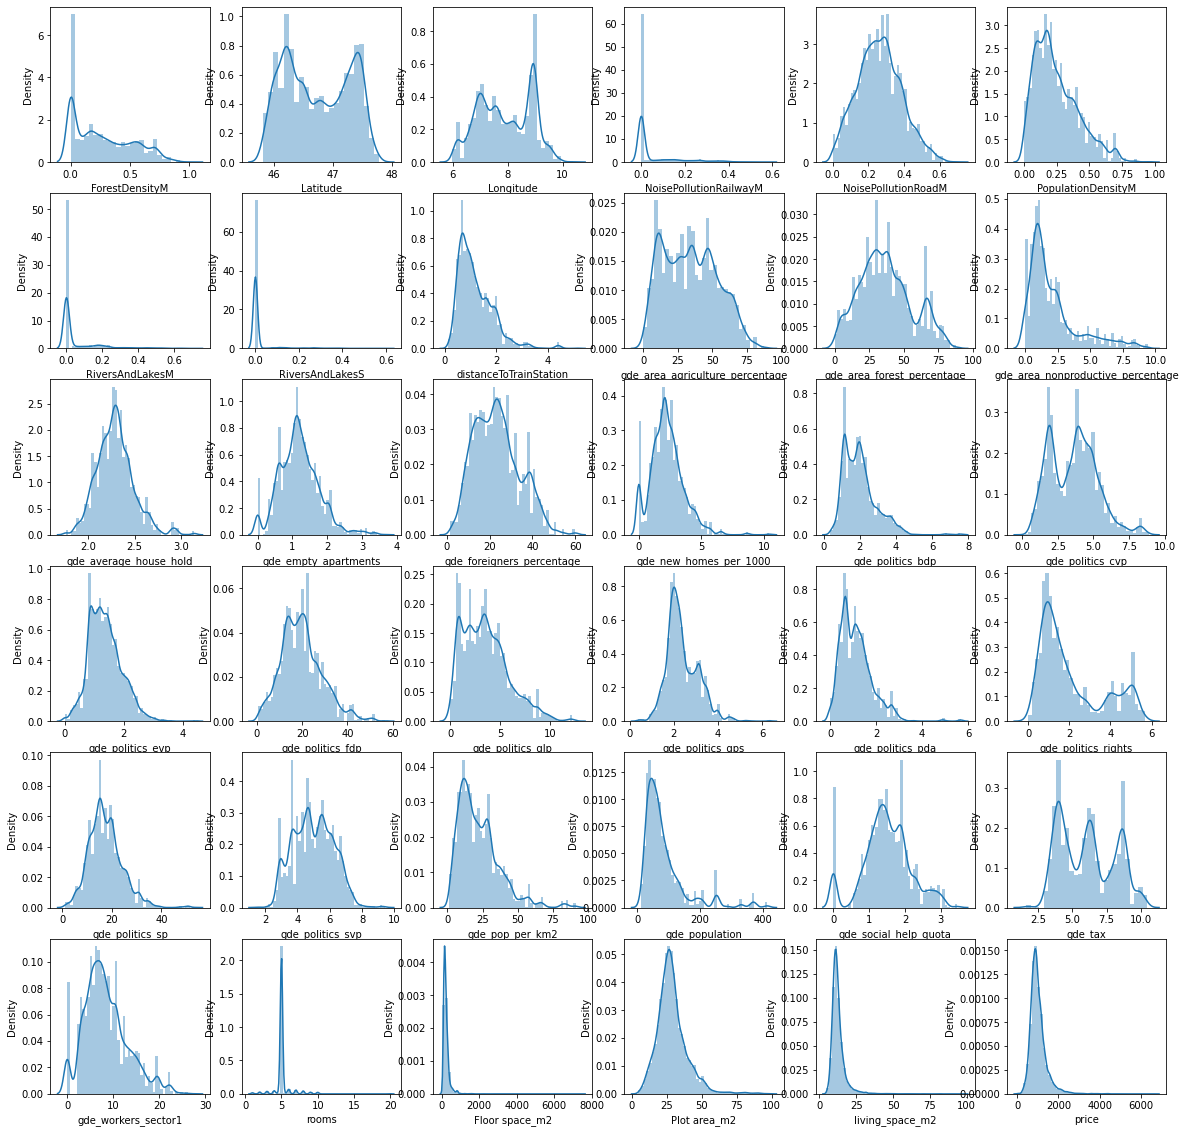

In [50]:
# Plotting the distribution of the rechtsschief data in a subplot
fig, axes = plt.subplots(nrows=grid_number, ncols=grid_number, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    sns.distplot(model_df.iloc[:, i], ax=ax)


'''for col in rechtsschief:
    plt.figure()
    sns.displot(model_df, x=col, kind = 'kde', fill = True)'''

#### Min Max Scaling (prone to outliers)

In [51]:
model_df_min_max = model_df.copy()

for col in model_df_min_max.columns:
    if col == "price":
        continue
    elif col.startswith("type_"):
        continue
    model_df_min_max[col] = (model_df_min_max[col] - model_df_min_max[col].min()) / (model_df_min_max[col].max() - model_df_min_max[col].min())

model_df_min_max.head()

,ForestDensityM,Latitude,Longitude,NoisePollutionRailwayM,NoisePollutionRoadM,PopulationDensityM,RiversAndLakesM,RiversAndLakesS,distanceToTrainStation,gde_area_agriculture_percentage,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,0.535358,0.808677,0.477811,0.0,0.095327,0.218913,0.059971,0.179598,0.322837,0.349452,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.535358,0.808677,0.477811,0.0,0.095327,0.218913,0.059971,0.179598,0.322837,0.349452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.309725,0.799258,0.468164,0.0,0.542063,0.411418,0.611332,0.000000,0.165755,0.129345,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.535358,0.808677,0.477811,0.0,0.095327,0.218913,0.059971,0.179598,0.322837,0.349452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.528611,0.803051,0.470341,0.0,0.189001,0.143119,0.529995,0.499448,0.216434,0.377484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Normalization (actually you change the distribution of your data)

In [52]:
model_df_norm = model_df.copy()

for col in model_df_norm.columns:
    if col == "price":
        continue
    elif col.startswith("type_"):
        continue
    model_df_norm[col] = (model_df_norm[col] - model_df_norm[col].mean()) / (model_df_norm[col].max() - model_df_norm[col].min())


model_df_norm.head()

,ForestDensityM,Latitude,Longitude,NoisePollutionRailwayM,NoisePollutionRoadM,PopulationDensityM,RiversAndLakesM,RiversAndLakesS,distanceToTrainStation,gde_area_agriculture_percentage,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,0.265900,0.344111,0.041019,-0.084577,-0.279852,-0.040884,-0.011164,0.152737,0.110989,-0.039162,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.265900,0.344111,0.041019,-0.084577,-0.279852,-0.040884,-0.011164,0.152737,0.110989,-0.039162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.040268,0.334692,0.031373,-0.084577,0.166884,0.151621,0.540197,-0.026860,-0.046093,-0.259269,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.265900,0.344111,0.041019,-0.084577,-0.279852,-0.040884,-0.011164,0.152737,0.110989,-0.039162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.259153,0.338485,0.033549,-0.084577,-0.186178,-0.116678,0.458860,0.472588,0.004586,-0.011130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Standardization (best method to use if the deature is normally distributed)

In [53]:
model_df_std = model_df.copy()

for col in model_df_std.columns:
    if col == "price":
        continue
    elif col.startswith("type_"):
        continue
    model_df_std[col] = (model_df_std[col] - model_df_std[col].mean()) / model_df_std[col].std()

model_df_std.head()

,ForestDensityM,Latitude,Longitude,NoisePollutionRailwayM,NoisePollutionRoadM,PopulationDensityM,RiversAndLakesM,RiversAndLakesS,distanceToTrainStation,gde_area_agriculture_percentage,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,1.087426,1.241835,0.190878,-0.487157,-1.604797,-0.235707,-0.071707,1.382163,0.837292,-0.178024,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.087426,1.241835,0.190878,-0.487157,-1.604797,-0.235707,-0.071707,1.382163,0.837292,-0.178024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.164680,1.207846,0.145988,-0.487157,0.956986,0.874142,3.469808,-0.243068,-0.347721,-1.178597,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.087426,1.241835,0.190878,-0.487157,-1.604797,-0.235707,-0.071707,1.382163,0.837292,-0.178024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.059833,1.221534,0.156115,-0.487157,-1.067625,-0.672683,2.947360,4.276577,0.034599,-0.050595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Robust Scaling (robust to outliers)

In [54]:
model_df_robust = model_df.copy()

for col in model_df_robust.columns:
    if col == "price":
        continue
    elif col.startswith("type_"):
        continue
    elif col == "RiversAndLakesS" or col == "rooms":
        # TO BE REVIEWED, generated inf values
        continue
    model_df_robust[col] = (model_df_robust[col] - model_df_robust[col].median()) / (model_df_robust[col].quantile(0.75) - model_df_robust[col].quantile(0.25))

model_df_robust.head()

,ForestDensityM,Latitude,Longitude,NoisePollutionRailwayM,NoisePollutionRoadM,PopulationDensityM,RiversAndLakesM,RiversAndLakesS,distanceToTrainStation,gde_area_agriculture_percentage,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,0.688099,0.686833,0.130463,0.0,-1.131549,0.009053,3.466803,0.108954,0.809961,-0.102607,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.688099,0.686833,0.130463,0.0,-1.131549,0.009053,3.466803,0.108954,0.809961,-0.102607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.198580,0.668920,0.106747,0.0,0.715140,0.802890,35.340030,0.000000,-0.078321,-0.709981,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.688099,0.686833,0.130463,0.0,-1.131549,0.009053,3.466803,0.108954,0.809961,-0.102607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.673461,0.676133,0.112097,0.0,-0.744323,-0.303501,30.638062,0.302994,0.208265,-0.025255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
'''target_path = Path("./data/model/immoscout_norm.csv")
model_df_norm.to_csv(target_path, index=False)

target_path = Path("./data/model/immoscout_min_max.csv")
model_df_min_max.to_csv(target_path, index=False)

target_path = Path("./data/model/immoscout_std.csv")
model_df_std.to_csv(target_path, index=False)

target_path = Path("./data/model/immoscout_robust.csv")
model_df_robust.to_csv(target_path, index=False)'''

'target_path = Path("./data/model/immoscout_norm.csv")\nmodel_df_norm.to_csv(target_path, index=False)\n\ntarget_path = Path("./data/model/immoscout_min_max.csv")\nmodel_df_min_max.to_csv(target_path, index=False)\n\ntarget_path = Path("./data/model/immoscout_std.csv")\nmodel_df_std.to_csv(target_path, index=False)\n\ntarget_path = Path("./data/model/immoscout_robust.csv")\nmodel_df_robust.to_csv(target_path, index=False)'